# This notebook will combine the prediction bit and the optimisation bit to see how the algorithm perform

In [1]:
# Magic line to avoid explicitely write plt.show()
%matplotlib inline

In [2]:
#do not show warnings
import warnings
warnings.filterwarnings("ignore")

## First part : Optimisation for cluster #0 (just as a test)

In [7]:
import pandas as pd

In [8]:
sales_clusters_df=pd.read_csv('../data/raw/sales_cluster_table.csv')

In [9]:
sales_clusters_df['noisy_date']=pd.to_datetime(sales_clusters_df['noisy_date'])

In [10]:
# The library I created is called FaaS : Forecast as a Service
import FaaS

In [11]:
help(FaaS.print_msg)

Help on function print_msg in module FaaS:

print_msg(msg)



100%|██████████| 32/32 [00:01<00:00, 25.54it/s]


------------------------------
The workload is reduced by 40%
------------------------------


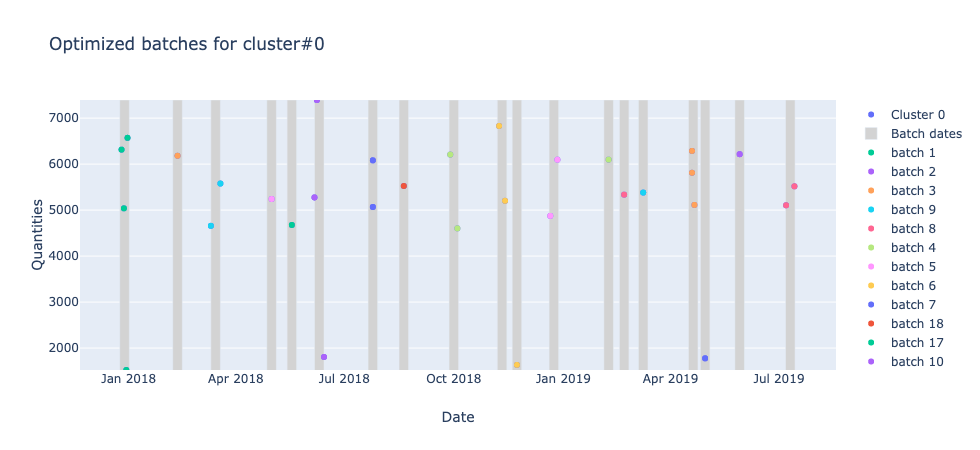

In [13]:
sales_cluster_0_optimization=FaaS.optimize_orders_processing(sales_clusters_df,0,'10 days')

In [14]:
sales_cluster_0_optimization.head()

,noisy_quantity,number_of_previous_neighbours,batch,batch_date
noisy_date,,,,
2017-12-26,6314.400966,1.0,1,2017-12-28 12:00:00
2017-12-28,5038.619159,2.0,1,2017-12-28 12:00:00
2017-12-30,1522.967281,3.0,1,2017-12-28 12:00:00
2017-12-31,6572.009204,4.0,1,2017-12-28 12:00:00
2018-02-11,6181.772772,1.0,11,2018-02-11 00:00:00
